In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv('Temp2.csv')
df.head(5)

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [56]:
df.shape

(36, 2)

In [57]:
date = pd.date_range(start='1/1/2002', end='12/31/2004',freq='M')
date

DatetimeIndex(['2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30',
               '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31',
               '2002-09-30', '2002-10-31', '2002-11-30', '2002-12-31',
               '2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31',
               '2003-09-30', '2003-10-31', '2003-11-30', '2003-12-31',
               '2004-01-31', '2004-02-29', '2004-03-31', '2004-04-30',
               '2004-05-31', '2004-06-30', '2004-07-31', '2004-08-31',
               '2004-09-30', '2004-10-31', '2004-11-30', '2004-12-31'],
              dtype='datetime64[ns]', freq='M')

In [58]:
df['Time_stamp'] = pd.DataFrame(date,columns=['Date'])

In [59]:
df.shape

(36, 3)

In [60]:
df=df.set_index('Time_stamp')

In [61]:
df1 = df.drop(['Month'],axis=1)
df1.head(5)

,Sales
Time_stamp,
2002-01-31,266.0
2002-02-28,145.9
2002-03-31,183.1
2002-04-30,119.3
2002-05-31,180.3


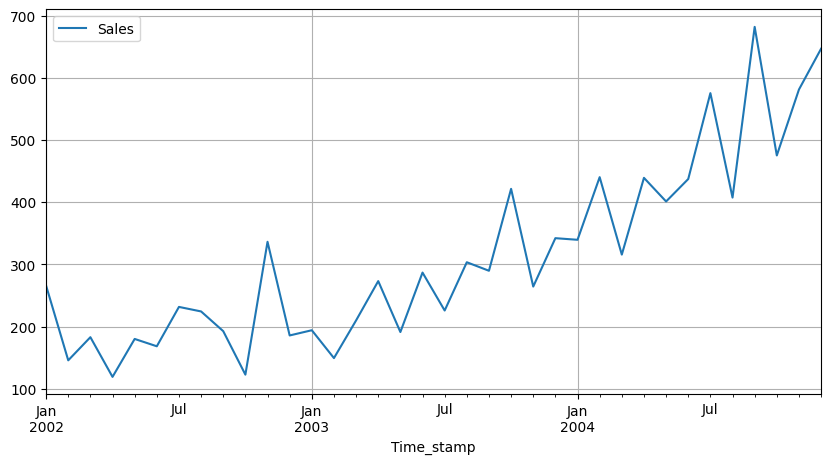

In [62]:
df1.plot(figsize=(10,5))
plt.grid();

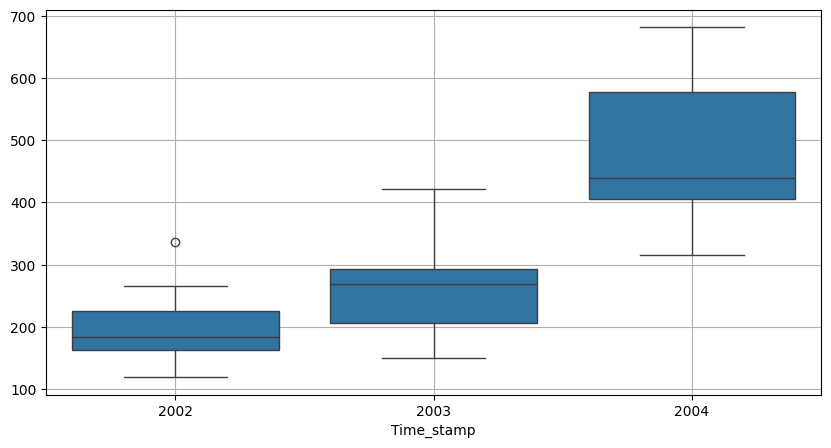

In [63]:
#EDA
_, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x=df1.index.year,y=df1.values[:,0],ax=ax)
plt.grid();

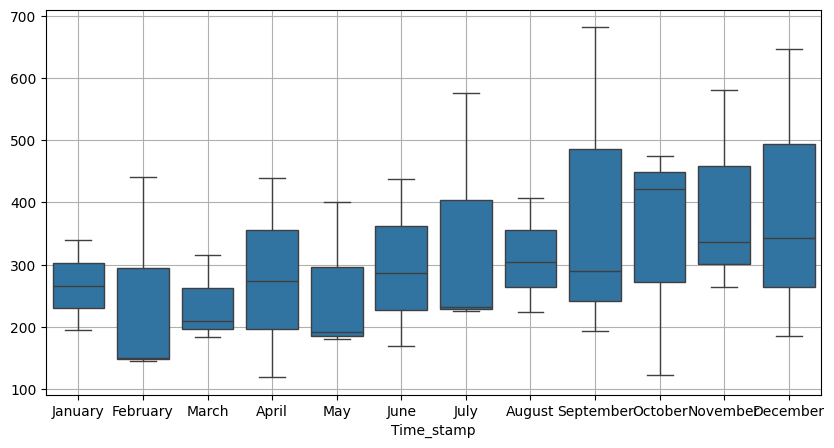

In [64]:
_, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x=df1.index.month_name(),y=df1.values[:,0],ax=ax)
plt.grid();

In [65]:
monthly_sales = pd.pivot_table(df1,
                               values='Sales',
                               columns=df1.index.month_name(),
                               index=df1.index.year)

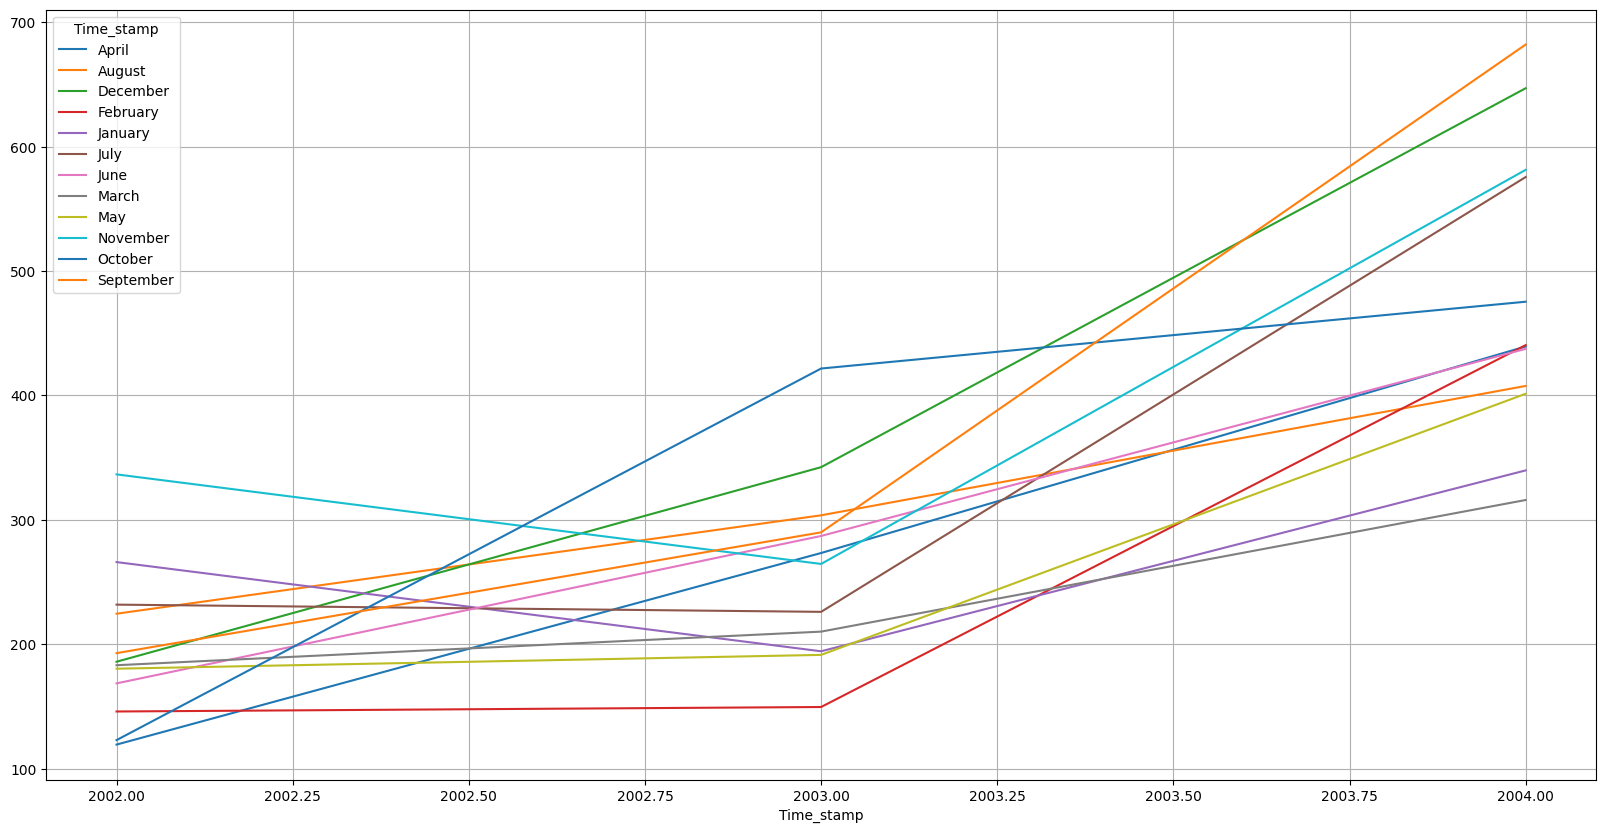

In [66]:
monthly_sales.plot(figsize=(20,10))
plt.grid();

In [67]:
quarterly_turnover = pd.pivot_table(df1,
                                    values='Sales',
                                    columns=df1.index.quarter,
                                    index=df1.index.year)

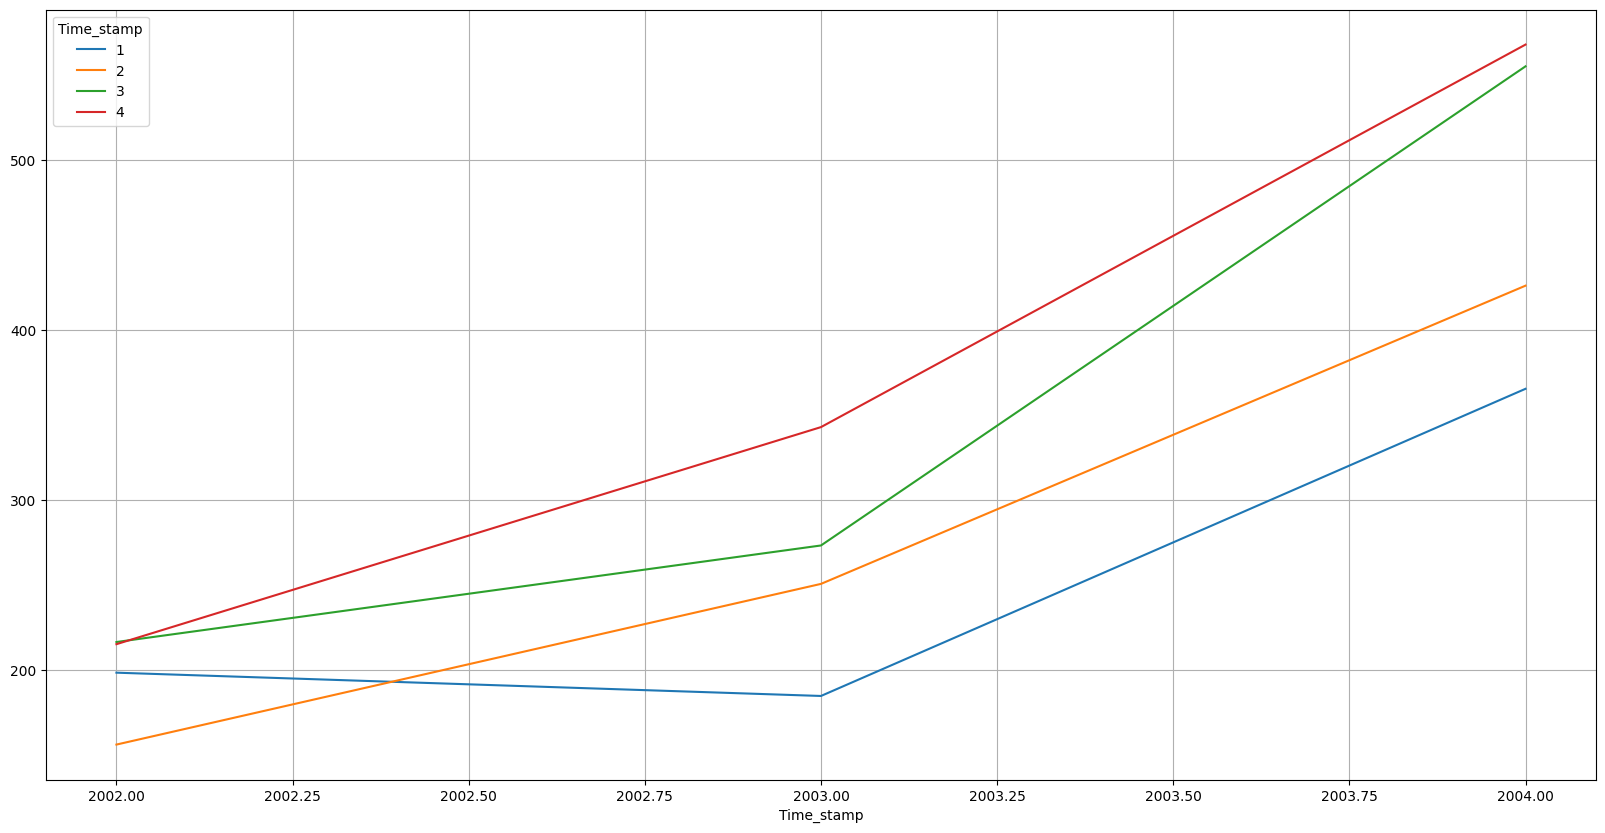

In [68]:
quarterly_turnover.plot(figsize=(20,10))
plt.grid();

In [69]:
quarterly_turnover

Time_stamp,1,2,3,4
Time_stamp,,,,
2002,198.333333,156.033333,216.366667,215.100000
2003,184.633333,250.566667,273.166667,342.800000
2004,365.333333,426.000000,555.033333,567.833333


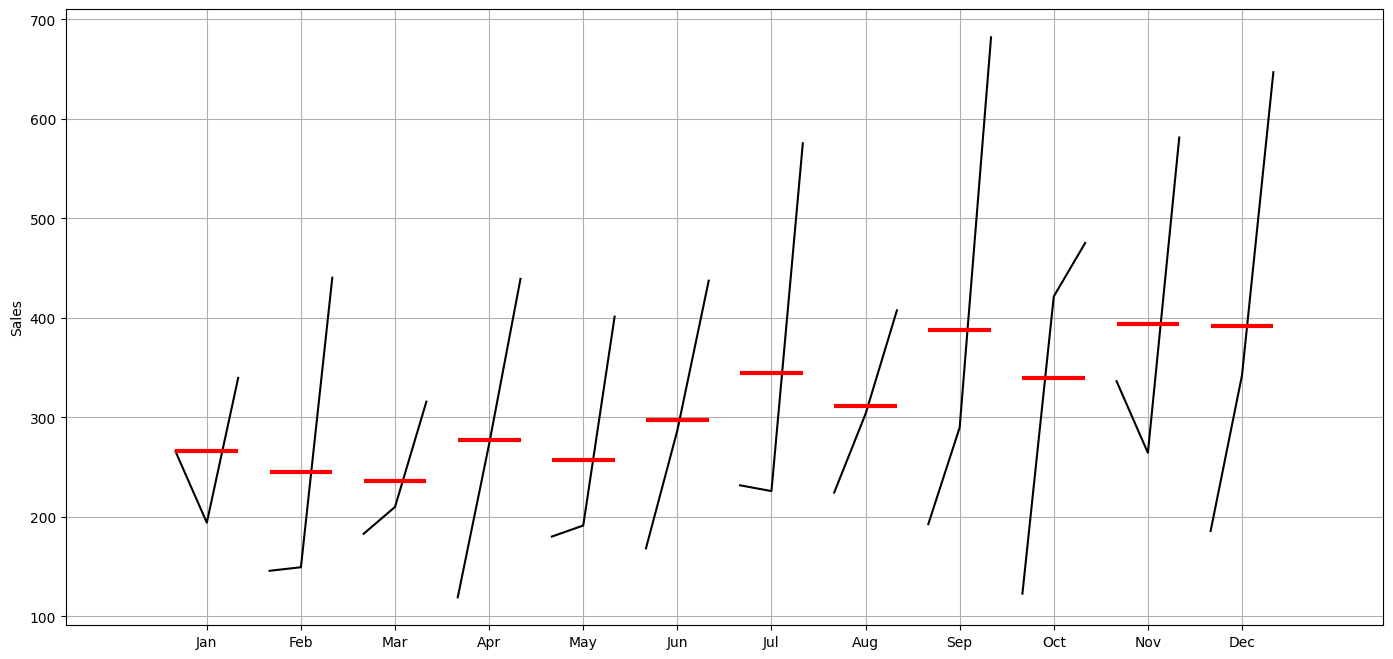

In [70]:
from pylab import rcParams
from statsmodels.graphics.tsaplots import month_plot

rcParams['figure.figsize'] = 17,8
plt.rc('xtick')
plt.rc('ytick')
month_plot(df1['Sales'],ylabel='Sales')
plt.grid();

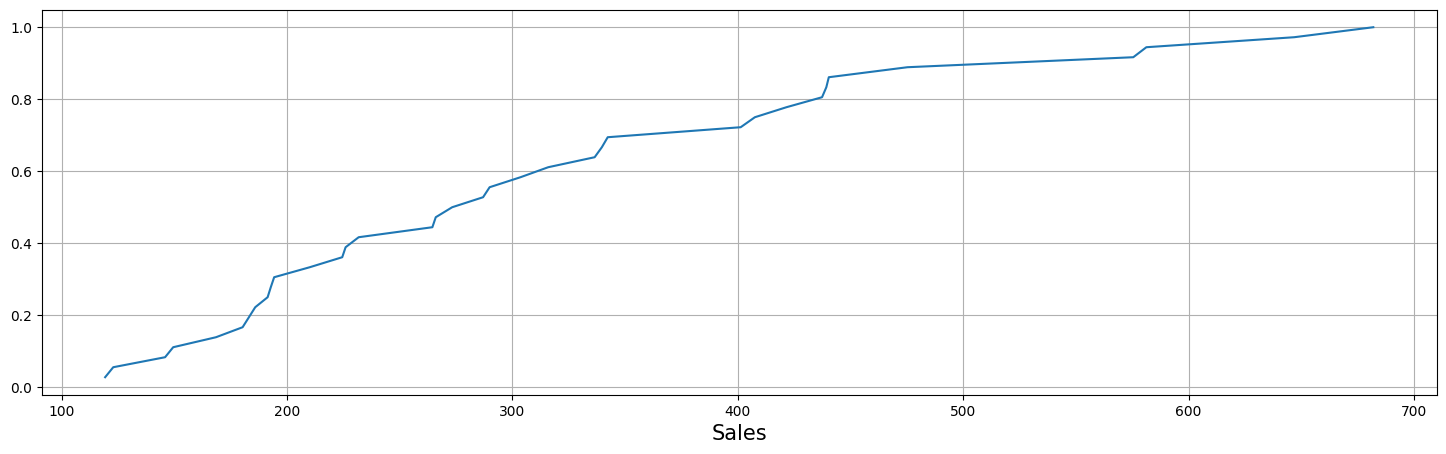

In [72]:
# stattistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize=(18,5))
cdf = ECDF(df1['Sales'])
plt.plot(cdf.x,cdf.y,label='statmodel');
plt.grid()
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.xlabel('Sales',fontsize=15);

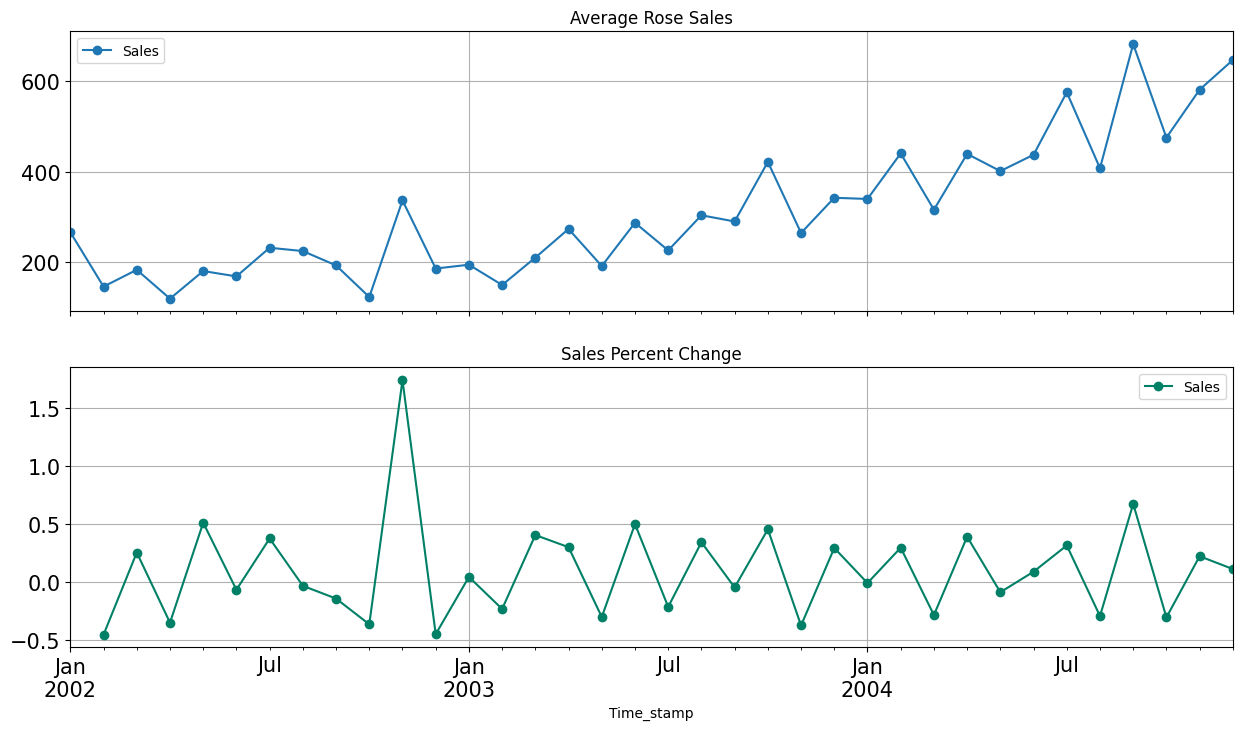

In [83]:
# group by date and get average Customers, and precent change
average    = df1.groupby(df1.index)["Sales"].mean()
pct_change = df1.groupby(df1.index)["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

#Number of customer over year-month

ax1 = average.plot(legend=True,
                   ax=axis1,
                   marker='o',
                   title="Average Rose Sales",
                   grid=True)

ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())

# plot precent change for over year-month
ax2 = pct_change.plot(legend=True,
                      ax=axis2,
                      marker='o',
                      colormap="summer",
                      title="Sales Percent Change",
                      grid=True)


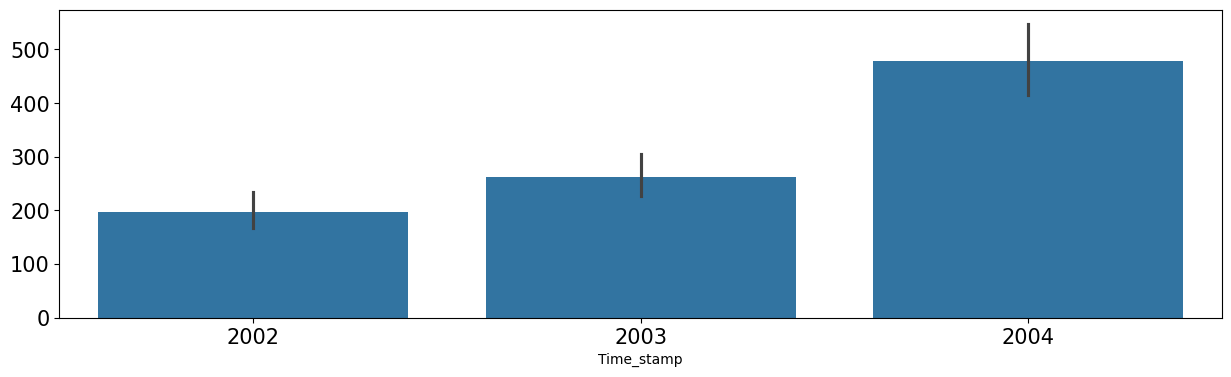

In [75]:
# plot sale for every year
fig, (axis1) = plt.subplots(1,figsize=(15,4))
sns.barplot(x=df1.index.year, y=df1.values[:,0],data=df1,ax=axis1);